# SGD with Momentum

SGD with Momentum is one of the optimizers which is used to improve the performance of the neural network. 

Advantages of SGD with Momentum:
- Momentum is faster than stochastic gradient descent the training will be faster than SGD.
- Local minima can be an escape and reach global minima due to the momentum involved.

For more information related to the mathematics behind the SGD with momentum, you can refer the article: [Stochastic Gradient Descent with momentum](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d).

## Import libraries

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# check version on pandas
print('Version of pandas:', pd.__version__)
print('Version of numpy:', np.__version__)

Version of pandas: 2.1.1
Version of numpy: 1.26.1


## Create the input and output data

In [3]:
# creating the input array
X = np.array([[1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 1]])

# converting the input in matrix form
X = X.T
print('Input:\n', X)

# shape of input array
print('Shape:', X.shape)

Input:
 [[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]
Shape: (4, 3)


In [4]:
# creating the output array
y = np.array([[1], [1], [0]])

# output in matrix form
y = y.T

print('Actual output:\n', y)

# shape of output array
print('Shape:', y.shape)

Actual output:
 [[1 1 0]]
Shape: (1, 3)


In [5]:
# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# defining the hyperparameters of the model
lr = 0.01 # learning rate
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer
epochs = 10000 # number of epochs

# initializing weight
w_ih = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
w_ho = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))

# defining the momentum parameters
beta = 0.9
v_ho = 0
v_ih = 0

In [7]:
error_momentum = []

for i in range(epochs):
    
    # Forward Propogation    
    # hidden layer activations
    hidden_layer_input = np.dot(w_ih.T, X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    
    # calculating the output
    output_layer_input = np.dot(w_ho.T, hiddenlayer_activations)
    output = sigmoid(output_layer_input)
    
    # Backward Propagation
    # calculating error
    error = np.square(y - output)/2
    error_wrt_output = -(y-output)
    output_wrt_Z2 = np.multiply(output,(1 - output))
    Z2_wrt_who = hiddenlayer_activations
    
    # rate of change of error w.r.t weight between output and hidden layer
    error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output * output_wrt_Z2).T)
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1 * np.dot(Z2_wrt_h1, (error_wrt_output * output_wrt_Z2))).T)

    # weighted gradient
    v_ho = beta * v_ho + (1 - beta)*error_wrt_who
    w_ho = w_ho - lr * v_ho
    v_ih = beta * v_ih + (1 - beta)*error_wrt_wih
    w_ih = w_ih - lr * v_ih
    
    # appending the error of each epoch
    error_momentum.append(np.average(error))

print(error_momentum[:10])

[0.10660621355021406, 0.10660502486793666, 0.10660276651073974, 0.10659954569949943, 0.10659545902534441, 0.10659059349479467, 0.10658502747370187, 0.10657883153948987, 0.10657206925036407, 0.10656479783938394]


## Plot the graph

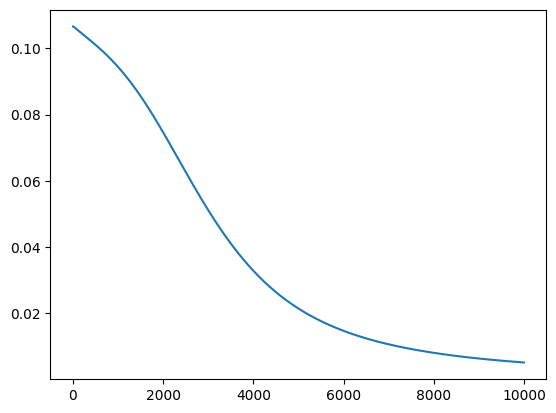

In [8]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(error_momentum))